<font size = 5>ЗАДАЧИ
1. Провести первичный анализ датасета.
   В рамках этой задачи вам предстоит:

- привести столбцы к корректным типам данных;
- убедиться, что данные по обеим группам представлены за одинаковый период (визуализировать);
- проверить корректность распределения участников теста;
- проверить различие в группах;
- проверить пересечение аудитории в группах;
- определить по группам ряд показателей (количество пользователей, количество покупок, выручку, конверсию, средний чек);
- посмотреть, как распределяются суммы покупок (здесь необходимо повизуализировать);
- сделать первичные выводы.
2. Рассчитайте кумулятивные метрики:
- постройте график конверсии в группах по дням;
- постройте график среднего чека в группах по дням;
- постройте график кумулятивных метрик по конверсии и по среднему чеку;
- сделайте выводы.
3. Проведите статистическую проверку гипотез:
- о равенстве конверсии;
- о равенстве выручки;
- о равенстве средних чеков по дням.
4. Сделайте вывод.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth
df = pd.read_csv('ab_data.csv')
df.head()

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
2,2,661590,2021-01-11,B,0,0
3,3,853541,2021-01-08,B,0,0
4,4,864975,2021-01-21,A,1,150000


In [ ]:
#проверем есть ли пустые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  294478 non-null  int64 
 1   user_id     294478 non-null  int64 
 2   date        294478 non-null  object
 3   group       294478 non-null  object
 4   purchase    294478 non-null  int64 
 5   price       294478 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.5+ MB


In [ ]:
#преобразуем в формат дат
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
#проверяем макс и мин дату в датафрейме
df['date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  294478
unique                     23
top       2021-01-08 00:00:00
freq                    13564
first     2021-01-02 00:00:00
last      2021-01-24 00:00:00
Name: date, dtype: object

In [ ]:
#проверяем кол-во юзеров по группам
df_piv = df.groupby(['group']).agg({'user_id':'count'}).reset_index()
df_piv.head()

,group,user_id
0,A,147202
1,B,147276


In [ ]:
# Создадим сводную таблицу
cross = df.pivot_table(index='user_id',
              columns='group',
              values='date',
              aggfunc='max')
# Из получившейся выше сводной таблицы выведем столбцы, где А и Б заполнены
cross[(~cross['A'].isna()) & (~cross['B'].isna())]
#Мы получили 1 895 идентификаторов пользователей, которые видели оба варианта теста

group,A,B
user_id,,
630320,2021-01-07,2021-01-12
630805,2021-01-22,2021-01-12
630871,2021-01-08,2021-01-03
630887,2021-01-07,2021-01-22
631008,2021-01-21,2021-01-22
...,...,...
945272,2021-01-14,2021-01-18
945308,2021-01-20,2021-01-03
945369,2021-01-15,2021-01-24


In [ ]:
#исключаем повторяющихся пользователей и смотрим сколько осталось юзеров по группам
df1 = df[~df['user_id'].isin(cross[(~cross['A'].isna()) & (~cross['B'].isna())].index)]
df_piv_2 = df1.groupby(['group']).agg({'user_id':'count','purchase':'sum','price':'sum'}).reset_index()

df_piv_2['conversion'] = round(df_piv_2['purchase']/df_piv_2['user_id']*100,2)
df_piv_2['average_chek'] = round(df_piv_2['price']/df_piv_2['purchase'],2)
df_piv_2.head()


,group,user_id,purchase,price,conversion,average_chek
0,A,145307,17487,1417780000,12.03,81076.23
1,B,145381,17290,1533010000,11.89,88664.55


Несмотря на то что в группе B было больше посетителей, (относительная) конверсия в группе B меньше на 1.16%. За счёт меньшей конверсии в группе B было меньше покупок, однако выручка группы B больше выручки группы A на 115230000 единиц, или 7.5%. Большая выручка в группе B складывается за счёт того, что средний чек группы B выше среднего чека группы A.

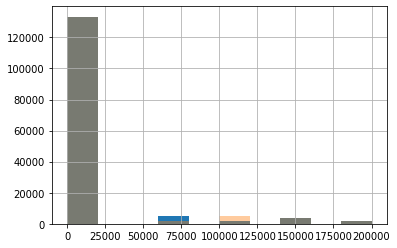

In [ ]:
#постоим гистограмму по выручке для
df1[df1['group'] == 'A']['price'].hist()
df1[df1['group'] == 'B']['price'].hist(alpha=0.4)

Участники группы A чаще покупают туры за 60000 рублей, при этом реже покупают туры за 100000 рублей. В остальном покупательская способность обеих групп похожа.

In [ ]:

df1.head()

,Unnamed: 0,user_id,date,group,purchase,price,conversion
0,0,851104,2021-01-21,A,0,0,0.0000
1,1,804228,2021-01-12,A,0,0,0.0000
2,2,661590,2021-01-11,B,0,0,0.0000
3,3,853541,2021-01-08,B,0,0,0.0000
4,4,864975,2021-01-21,A,1,150000,0.0001


In [ ]:
#создаём отдельные датафреймы по группам
df_a = df1[df1['group'] == 'A']
df_b = df1[df1['group'] == 'B']

In [ ]:
df1_piv = df1. groupby(['date', 'group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()
df1_piv['conversion'] = round(df1_piv['purchase']/df1_piv['user_id']*100,4)
df1_piv['average_chek'] = round(df1_piv['price']/df1_piv['purchase'],2)
dfa_piv = df_a. groupby(['date', 'group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()
dfb_piv = df_b. groupby(['date', 'group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()

In [ ]:
def cummulative_table(data): # В переменную data будем передавать название переменной датафейма
    df_cumm = [] # Создаём пустой список
    for i in data['date'].values: # Запускаем цикл по каждому отдельному значению даты
        out = data[data['date'] <= i].groupby('group')\
               .agg({'date':'max', 'user_id':'sum', 'purchase':'sum', 'price':'sum'})
        df_cumm.append(out) # Полученный срез добавляем в созданный ранее список
    return pd.concat(df_cumm).reset_index() # Объединяем списки и возвращаем результат

In [ ]:
cumm_a = cummulative_table(dfa_piv)
cumm_b = cummulative_table(dfb_piv)
cumm_a.head()

,group,date,user_id,purchase,price
0,A,2021-01-02,2854,359,29410000
1,A,2021-01-03,9450,1107,91410000
2,A,2021-01-04,16016,1906,155660000
3,A,2021-01-05,22449,2696,220210000
4,A,2021-01-06,29055,3460,283620000


In [ ]:
#добавляем столбцы конверсии и среднего чека в датафреймы
cumm_a['conversion'] = round(cumm_a['purchase']/cumm_a['user_id']*100,2)
cumm_a['average_chek'] = round(cumm_a['price']/cumm_a['purchase'],2)

cumm_b['conversion'] = round(cumm_b['purchase']/cumm_b['user_id']*100,2)
cumm_b['average_chek'] = round(cumm_b['price']/cumm_b['purchase'],2)


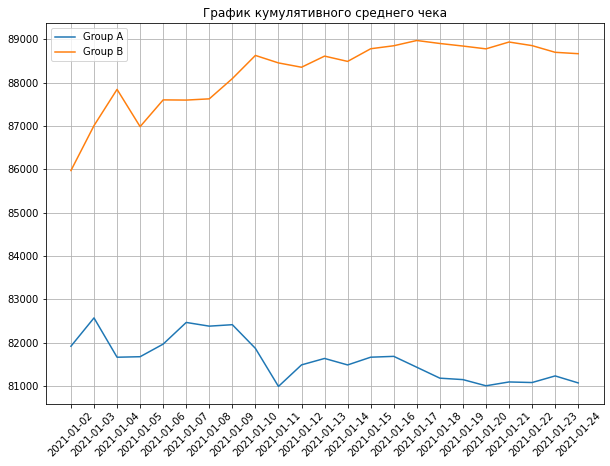

In [ ]:
#построим график куммулятивного среднего чека по дням
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['average_chek'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['average_chek'], label='Group B')
plt.title('График кумулятивного среднего чека')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

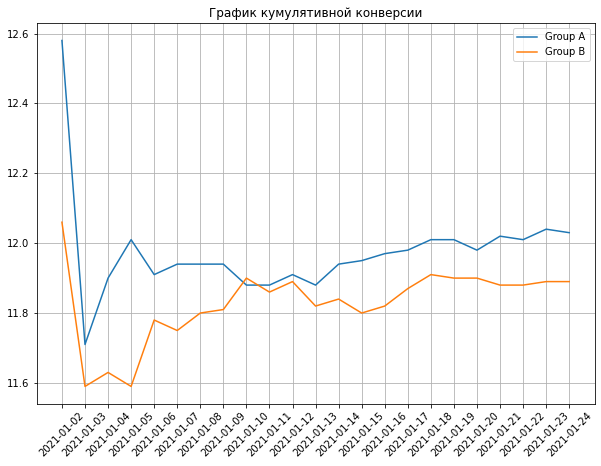

In [ ]:
#построим график куммулятивного среднего чека по дням
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['conversion'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['conversion'], label='Group B')
plt.title('График кумулятивной конверсии')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

Изначально конверсия группы B была ниже конверсии группы А, однако она показывала стабильный рост, и примерно 10 января конверсия группы B стала выше конверсии группы А. После чего конверсия группы B зафиксировалась примерно на этом уровне (с колебаниями). В то время как конверсия группы А начала постепенно расти. В результате конверсия группы А стабильно выше группы B. Но средний чек группы B выше среднего чека группы А.

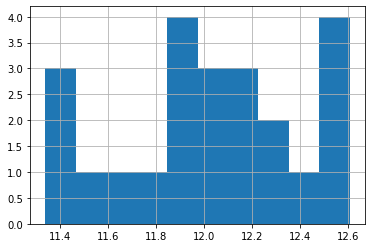

In [ ]:
#постоим гистограммы по конверсии для группы A
df1_piv[df1_piv['group'] == 'A']['conversion'].hist()


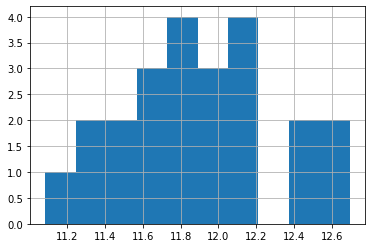

In [ ]:
#постоим гистограммы по конверсии для группы B
df1_piv[df1_piv['group'] == 'B']['conversion'].hist()

In [ ]:
# Зададим уровень значимости
a = .05
# Применим метод shapiro()
shapiro_a = st.shapiro(cumm_a['price'])
shapiro_b = st.shapiro(cumm_b['price'])
print(shapiro_a)
print(shapiro_b)
print(shapiro_a[1] > a) # Распределение является нормальным
print(shapiro_b[1] > a) # Распределение является нормальным

(0.9562297463417053, 0.3916109800338745)
(0.9543511867523193, 0.3592090308666229)
True
True


In [ ]:
# Проведем Z-тест
# Зададим уровень значимости и применим Z-тест

a = .05
x1 = df1[df1['group'] == 'A']['purchase'].sum()
x2 = df1[df1['group'] == 'B']['purchase'].sum()
n1 = df1[df1['group'] == 'A']['user_id'].count()
n2 = df1[df1['group'] == 'B']['user_id'].count()
p1 = x1/n1
p2 = x2/n2
p = (x1+x2)/(n1+n2)
diff = p1-p2
z = diff/mth.sqrt(p*(1-p)*(1/n1+1/n2))
distr = st.norm(0,1)
p_val = (1 - distr.cdf(abs(z)))*2
print(p_val) 
print(p_val < a)

0.23940749849829834
False


In [ ]:
# Проведем тест Манна-Уитни
# Зададим уровень значимости и применим тест Манна-Уитни
alpha = .05
results = st.mstats.mannwhitneyu(df1[(df1['group'] == 'A') & (df1['purchase'] == 1)]['price'].values, df1[(df1['group'] == 'B') & (df1['purchase'] == 1)]['price'].values)
print('p-value', results.pvalue/2)

if (results.pvalue/2 < alpha):
   print("Отвергаем нулевую гипотезы - средние чеки не равны")
else:
   print("Не отвергаем нулевую гипотезу - Средний чеки обеих групп равны")

p-value 1.412680672643368e-37
Отвергаем нулевую гипотезы - средние чеки не равны


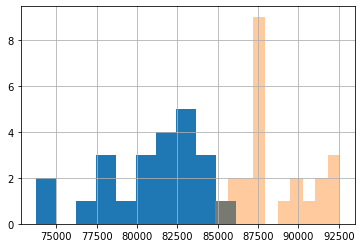

In [ ]:
#постоим гистограммы по среднему чеку для группы A
df1_piv[df1_piv['group'] == 'A']['average_chek'].hist()
df1_piv[df1_piv['group'] == 'B']['average_chek'].hist(alpha=0.4)

In [ ]:
#проверяем гипотезу с помощью T-тест
alpha = .05


results = st.ttest_ind(df1_piv[df1_piv['group'] == 'A']['average_chek'], df1_piv[df1_piv['group'] == 'B']['average_chek'], equal_var = True)   
print(results)
print('p-value', results.pvalue)

if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезы - Cредние баллы не равны")
else:
   print("Не отвергаем нулевую гипотезу - Средние баллы обеих групп равны")

Ttest_indResult(statistic=-9.609060180794826, pvalue=2.2523650297552113e-12)
p-value 2.2523650297552113e-12
Отвергаем нулевую гипотезы - Cредние баллы не равны


Несмотря на то что конверсия группы B ниже, статистической значимости в конверсии не достигнуто, соответственно, считать конверсии разными оснований нет. Зато средний чек группы B значительно выше среднего чека группы A. Статистическая значимость достигнута. Вариант сайта B приносит значимо больше выручки, чем вариант сайта A. Рекомендуем признать, что вариант B лучше, чем вариант A!